In [1]:
import pandas as pd 

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [2]:
pwd

'D:\\DataScience\\Machine Learning Sections\\5. Support-Vector-Machines'

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
import seaborn as sns 

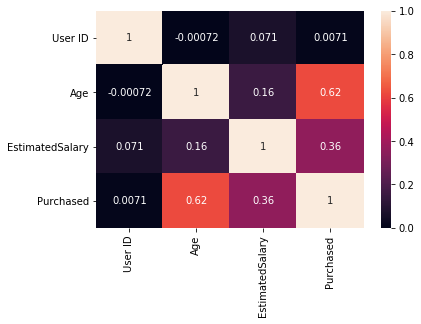

In [7]:
sns.heatmap(dataset.corr(), annot=True)

In [9]:
gen = pd.get_dummies(dataset['Gender'],drop_first=True)

In [10]:
sample_data = pd.concat([dataset,gen],axis=1)

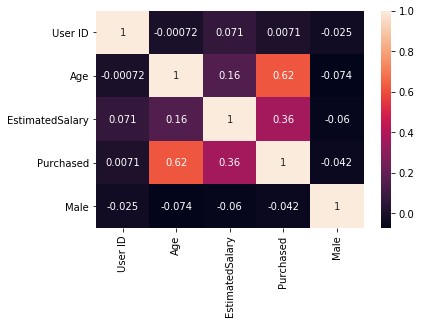

In [11]:
sns.heatmap(sample_data.corr(), annot=True)

In [13]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
Male               400 non-null uint8
dtypes: int64(4), object(1), uint8(1)
memory usage: 16.1+ KB


In [14]:
sample_data.drop(['Gender','User ID','Male'], axis=1, inplace=True)

In [15]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(sample_data.drop('Purchased',axis=1))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_features = scaler.transform(sample_data.drop('Purchased',axis=1))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [20]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [21]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,sample_data['Purchased'],
                                                    test_size=0.30)

In [34]:
X_train.count()

Age                280
EstimatedSalary    280
dtype: int64

In [35]:
y_train.count()

280

In [36]:
X_test.count()

Age                120
EstimatedSalary    120
dtype: int64

In [37]:
y_test.count()

120

In [39]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[72,  6],
       [ 4, 38]], dtype=int64)